Dataset Loaded Successfully!
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

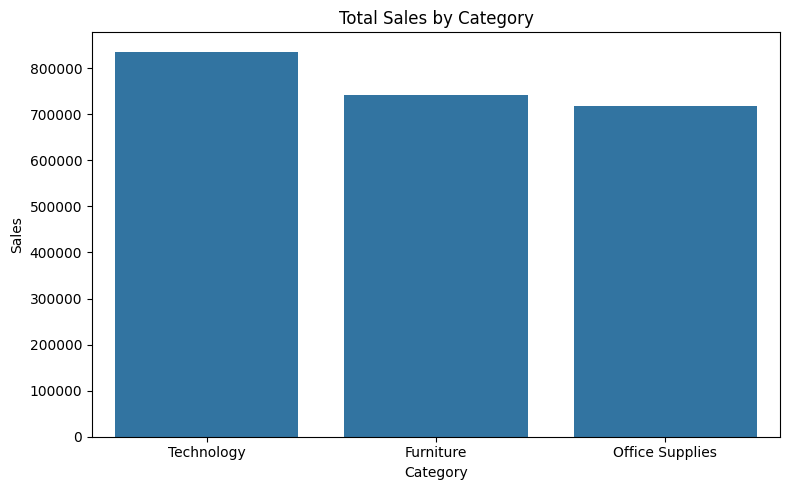

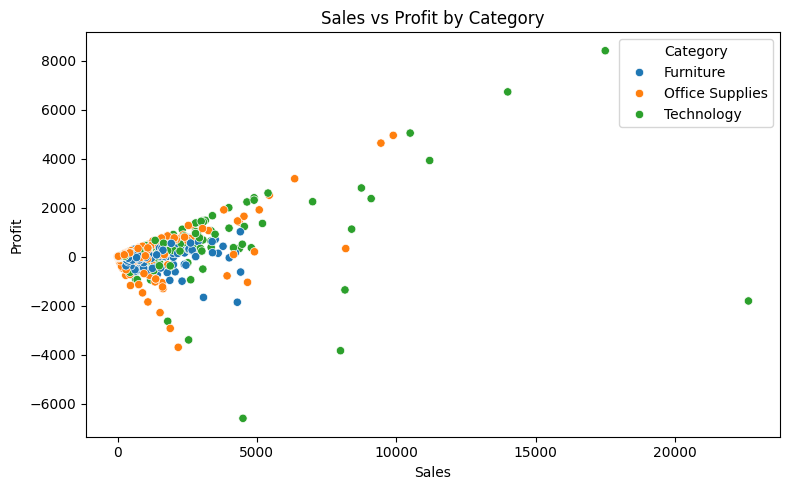

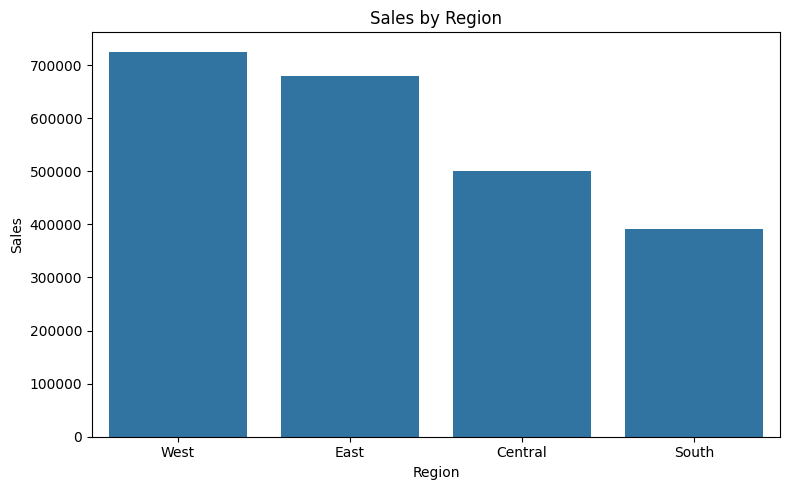

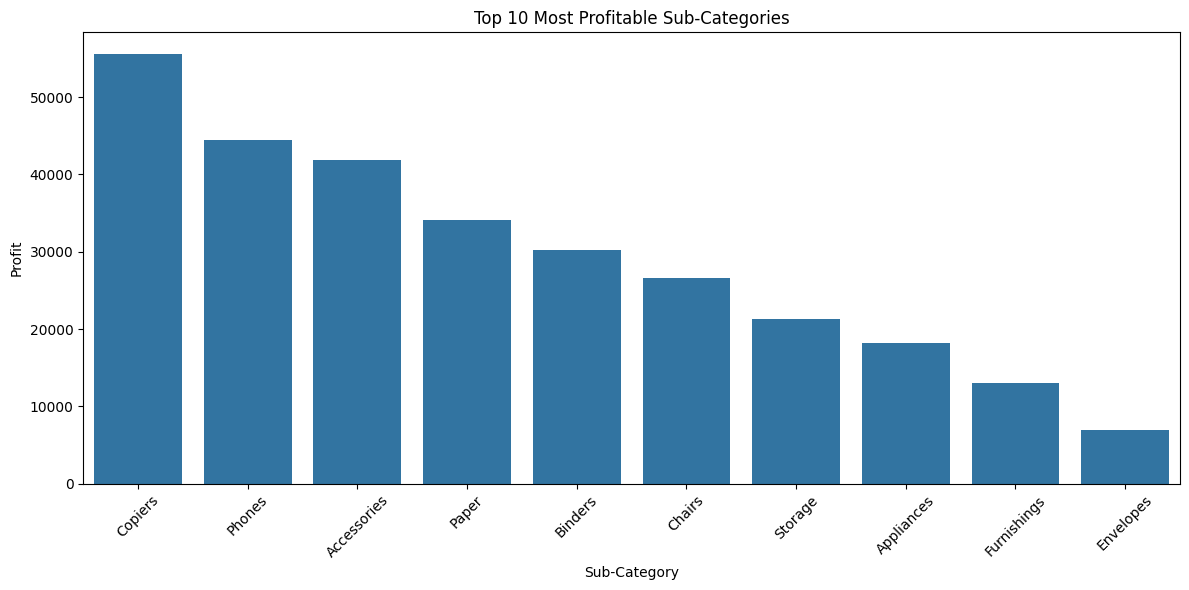

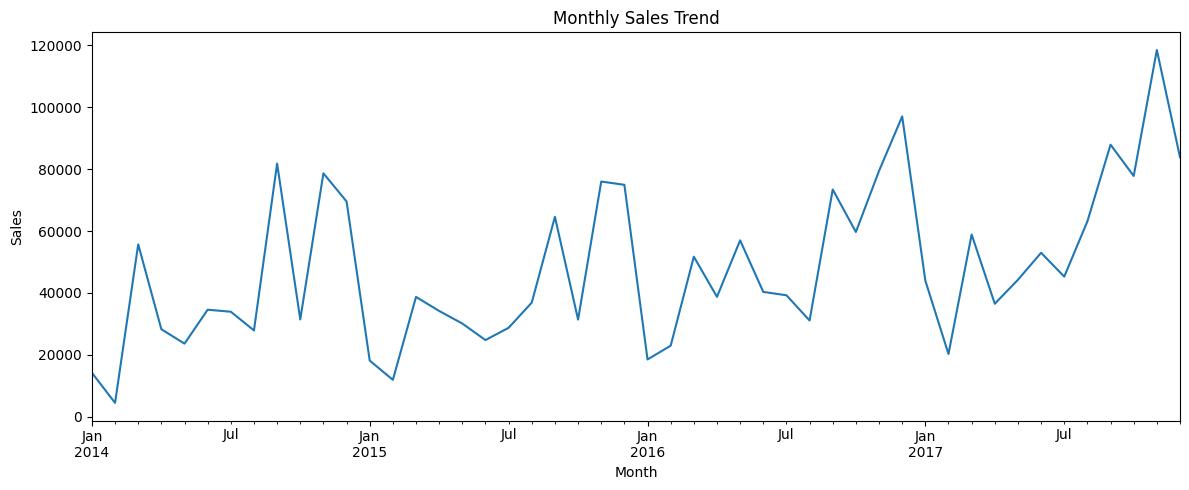

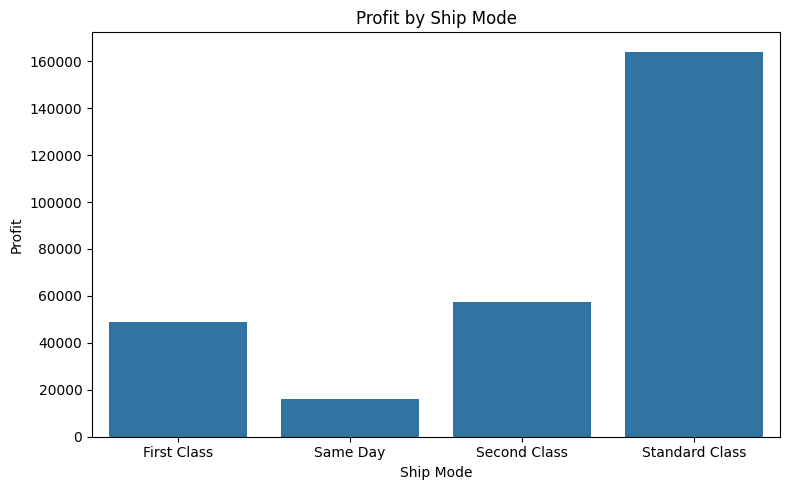

All Charts Generated Successfully!


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
with zipfile.ZipFile("/content/archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

df = pd.read_csv("/content/Sample - Superstore.csv", encoding="latin1") # Corrected filename

print("Dataset Loaded Successfully!")
print(df.head())

# -----------------------------
# 1. Total Sales by Category
# -----------------------------
plt.figure(figsize=(8,5))
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("1_total_sales_by_category.png")
plt.show()

# -----------------------------
# 2. Sales vs Profit Scatter Plot
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("2_sales_vs_profit.png")
plt.show()

# -----------------------------
# 3. Sales by Region
# -----------------------------
plt.figure(figsize=(8,5))
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("3_sales_by_region.png")
plt.show()

# -----------------------------
# 4. Profit by Sub-Category (Top 10)
# -----------------------------
plt.figure(figsize=(12,6))
subcat_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=subcat_profit.index, y=subcat_profit.values)
plt.title("Top 10 Most Profitable Sub-Categories")
plt.xticks(rotation=45)
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("4_top10_profit_subcategory.png")
plt.show()

# -----------------------------
# 5. Monthly Sales Trend
# -----------------------------
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("5_monthly_sales_trend.png")
plt.show()

# -----------------------------
# 6. Profit by Ship Mode
# -----------------------------
plt.figure(figsize=(8,5))
ship_profit = df.groupby("Ship Mode")["Profit"].sum()
sns.barplot(x=ship_profit.index, y=ship_profit.values)
plt.title("Profit by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("6_profit_by_shipmode.png")
plt.show()

print("All Charts Generated Successfully!")